# LEAD SCORING CASE STUDY ASSIGNMENT

#### By Chollangi Venkata Kailash , Narakula Venkata Siva Sai Teja _ DSC41 

## Lead Scoring Case Study.
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals of the Case Study


1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


## 1. Loading Libraries and source file

In [1]:
# Importing all necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
lead=pd.read_csv('Leads.csv')

## 2. Data Understanding

In [4]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

##### So far the columns has nulls

In [8]:
lead.shape

(9240, 37)

In [9]:
# Checking for duplicates
# Creating a copy of original dataframe for duplicate check
lead_cpy = lead

# Checking for duplicates and dropping the entire duplicate row if any
lead_cpy.drop_duplicates(subset=None, inplace=True)
lead_cpy.shape

(9240, 37)

##### Columns and rows do not contain duplicate values. As a result, there are quite a few nulls, which we will deal with in the Data Cleaning step

## 3. Data Cleaning/ Data Imputation


 ### 3.1The problem statement states that many of the categorical variables have a level called "Select", which is mostly null values and should be handled.

In [10]:
# Creating List of columns having word "Select" in them

cols_having_select_word=[]
for col in lead.columns:
    if len(lead[col].isin(['Select']).unique())>1:
        cols_having_select_word.append(col)
print(cols_having_select_word)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


##### Looking at the unique values in these columns

In [11]:
lead[['Specialization']].value_counts()

Specialization                   
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
dtype: int64

In [12]:
lead[['How did you hear about X Education']].value_counts()

How did you hear about X Education
Select                                5043
Online Search                          808
Word Of Mouth                          348
Student of SomeSchool                  310
Other                                  186
Multiple Sources                       152
Advertisements                          70
Social Media                            67
Email                                   26
SMS                                     23
dtype: int64

In [13]:
lead[['Lead Profile', 'City']].value_counts()

Lead Profile                 City                       
Select                       Select                         1671
                             Mumbai                         1464
Potential Lead               Mumbai                          687
                             Select                          372
Select                       Other Cities                    300
                             Thane & Outskirts               288
Potential Lead               Thane & Outskirts               225
Other Leads                  Mumbai                          220
Select                       Other Cities of Maharashtra     199
                             Other Metro Cities              191
Potential Lead               Other Cities                    146
                             Other Cities of Maharashtra     110
Student of SomeSchool        Select                          103
Other Leads                  Select                           94
Student of SomeSchool        Mumb

In [14]:
# Replacing 'Select' with null for the following columns
# ['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City'] 

lead[['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']] = lead[['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']].replace('Select', np.nan)

In [15]:
# Checking if any colums are left with "Select" in them

cols_having_select_word=[]
for col in lead.columns:
    if len(lead[col].isin(['Select']).unique())>1:
        cols_having_select_word.append(col)
print(cols_having_select_word)

[]


##### "Select" has been replaced with nulls in ['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City'] columns

### 3.2 Column wise Null Value calculation

In [16]:
round(((lead.isnull().sum()/lead.shape[0])*100),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

### 3.3 Row wise Null Value calculation

In [17]:
lead.shape

(9240, 37)

In [18]:
round(((lead.isnull().sum(axis=1)/lead.shape[1])*100),2).sort_values(ascending=False)

5840    40.54
2942    37.84
3928    37.84
4768    35.14
3897    35.14
        ...  
7888     0.00
2235     0.00
1050     0.00
2223     0.00
5426     0.00
Length: 9240, dtype: float64

##### Row Level nulls seems to be within 40% nulls range. No action needed, this is for understanding the row level data

### 3.4 Dropping columns with column wise null percentage more than 45%

In [19]:
lead_cols = lead.isnull().sum()/lead.shape[0]
lead_cols = lead_cols[lead_cols.values > 0.45]
lead_cols

How did you hear about X Education    0.784632
Lead Quality                          0.515909
Lead Profile                          0.741883
Asymmetrique Activity Index           0.456494
Asymmetrique Profile Index            0.456494
Asymmetrique Activity Score           0.456494
Asymmetrique Profile Score            0.456494
dtype: float64

In [20]:
lead= lead.drop(lead_cols.keys(), axis=1)
round(((lead.isnull().sum()/lead.shape[0])*100),2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [21]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### 3.4 Imputing Null Values for Numerical Columns

In [22]:
numerical_col = lead.select_dtypes(include =["number"]).columns.values

print("NUMERICAL FEATURES : \n {} ".format(numerical_col))

NUMERICAL FEATURES : 
 ['Lead Number' 'Converted' 'TotalVisits' 'Total Time Spent on Website'
 'Page Views Per Visit'] 


##### 'TotalVisits' and 'Page Views Per Visit' have Null values.

#### 3.4.1 TotalVisits

In [23]:
lead.TotalVisits.value_counts().head(5)

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

##### "Total Visits" has only 1.48 Percentage Nulls, so imputing it with the most frequent value of TotalVisits shouldn''t be a problem

In [24]:
lead['TotalVisits'].fillna(lead['TotalVisits'].mode()[0], inplace=True)
lead['TotalVisits'].isnull().sum()

0

#### 3.4.2 Page Views Per Visit 

In [25]:
lead['Page Views Per Visit'].value_counts().head(5)

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

##### "Page Views Per Visit" has only 1.48 Percentage Nulls, so imputing it with the most frequent value of TotalVisits shouldn''t be a problem

In [26]:
lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].mode()[0], inplace=True)
lead['Page Views Per Visit'].isnull().sum()

0

### 3.5 Imputing Null Values for Categorical Columns

In [27]:
# Reusable function to see details about the categorical columns
def Cat_info(df, categorical_column):
    df_result = pd.DataFrame(columns=["columns","values","unique_values","null_values","null_percent"])
    
    df_temp=pd.DataFrame()
    for value in categorical_column:
        df_temp["columns"] = [value]
        df_temp["values"] = [df[value].unique()]
        df_temp["unique_values"] = df[value].nunique()
        df_temp["null_values"] = df[value].isna().sum()
        df_temp["null_percent"] = (df[value].isna().sum()/len(df)*100).round(1)
        df_result = df_result.append(df_temp)
   
    df_result.sort_values("null_values", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [28]:
categorical_col = lead.select_dtypes(exclude =["number"]).columns.values
print("Dataset has following Categorical Columns : \n \n {} \n\n".format(categorical_col))

Dataset has following Categorical Columns : 
 
 ['Prospect ID' 'Lead Origin' 'Lead Source' 'Do Not Email' 'Do Not Call'
 'Last Activity' 'Country' 'Specialization'
 'What is your current occupation'
 'What matters most to you in choosing a course' 'Search' 'Magazine'
 'Newspaper Article' 'X Education Forums' 'Newspaper'
 'Digital Advertisement' 'Through Recommendations'
 'Receive More Updates About Our Courses' 'Tags'
 'Update me on Supply Chain Content' 'Get updates on DM Content' 'City'
 'I agree to pay the amount through cheque'
 'A free copy of Mastering The Interview' 'Last Notable Activity'] 




In [29]:
categorical_col = lead.select_dtypes(exclude =["number"]).columns.values
new_cat = Cat_info(lead, categorical_col)
new_cat[new_cat['null_values']>0]

,values,unique_values,null_values,null_percent
columns,,,,
City,"[nan, Mumbai, Thane & Outskirts, Other Metro C...",6,3669,39.7
Specialization,"[nan, Business Administration, Media and Adver...",18,3380,36.6
Tags,"[Interested in other courses, Ringing, Will re...",26,3353,36.3
What matters most to you in choosing a course,"[Better Career Prospects, nan, Flexibility & C...",3,2709,29.3
What is your current occupation,"[Unemployed, Student, nan, Working Professiona...",6,2690,29.1
Country,"[nan, India, Russia, Kuwait, Oman, United Arab...",38,2461,26.6
Last Activity,"[Page Visited on Website, Email Opened, Unreac...",17,103,1.1
Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",21,36,0.4


In [30]:
print("#########################")
print("######### City ##########")
print("#########################")
print(lead['City'].value_counts().head(5))
print("\n")
print("#########################")

print("#### Specialization ####")
print("#########################")
print(lead['Specialization'].value_counts().head(5))
print("\n")

print("#########################")
print("######### Tags ##########")
print("#########################")
print(lead['Tags'].value_counts().head(5))
print("\n")

print("###################################################")
print("## What matters most to you in choosing a course ##")
print("###################################################")
print(lead['What matters most to you in choosing a course'].value_counts().head(5))
print("\n")

print("###################################################")
print("## What is your current occupation ##")
print("###################################################")
print(lead['What is your current occupation'].value_counts().head(5))
print("\n")

print("#########################")
print("######## Country ########")
print("#########################")
print(lead['Country'].value_counts().head(5))
print("\n")

print("#########################")
print("##### Last Activity ######")
print("#########################")
print(lead['Last Activity'].value_counts().head(5))
print("\n")

print("#########################")
print("##### Lead Source #######")
print("#########################")
print(lead['Lead Source'].value_counts().head(5))
print("#########################")

#########################
######### City ##########
#########################
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Name: City, dtype: int64


#########################
#### Specialization ####
#########################
Finance Management           976
Human Resource Management    848
Marketing Management         838
Operations Management        503
Business Administration      403
Name: Specialization, dtype: int64


#########################
######### Tags ##########
#########################
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Name: Tags, dtype: int64


###################################################
## What matters most to you in choosing a course ##
#######

#### Observations:-
1. City: There are almost 40% unknown values in the data, which makes it difficult to impute with mode. Also, X-Education is an online teaching platform. The city information will not be much useful as potential students can access any courses online despite their city. We will drop the column from analysis.
2. Specialization: Since there are 36% nulls and almost equal numbers of records in all the categories, we cannot choose one specialization for imputation. Hence we will create a new specialization as "Others"
3. Tags: "Tags" are created by the sales team based on the current status of the lead after they contact them. We're getting rid of this column because the information won't be useful for modelling.
4. What matters most to you in choosing a course: "Better Career Prospects" is having the highest number of occurrences and data is skewed towards this category;Therefore, having it in the model won't be helpful, so we will remove this column.
5. What is your current occupation: "Unemployed" has the highest number of occurrences, hence we will impute the missing values with label 'Unemployed'
6. Country: Country data is skewed because 95% of it is mapped to India. This is similar to what happened with the City data., Country data is not required for Model building as X-Education is an online platform. We will drop the country columns too.
7. Last Activity:"Email Opened" happens the most and only 1.11% is missing, so impute the null values with "Email Opened."
8. Lead Source: "Google" occurs the most in this column, and there are only 0.39% null values. So, we'll fill in the empty spots with "Google."

In [31]:
# Dropping Columns
print("Before Drop",lead.shape)
lead.drop(['City','Tags','Country','What matters most to you in choosing a course'],axis=1,inplace=True)
print("After Drop",lead.shape)

Before Drop (9240, 30)
After Drop (9240, 26)


In [32]:
# Imputing values as per the above observations

missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}

lead=lead.fillna(value=missing_values)

Categorical columns are fixed

In [33]:
round(((lead.isnull().sum()/lead.shape[0])*100),2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

All Nulls are been imputed

In [34]:
lead.shape

(9240, 26)

### 3.6 Checking if any other columns can be dropped

#### 3.6.1 "Prospect ID" & "Lead Number" variables indicates the ID number of the Contacted People & can be dropped."Last Notable Activity" is an intermediate column which is an update while the sales team representative is in touch with the lead.We will drop these columns because the model can't use information that won't be available until after the lead is contacted.

In [35]:
# Dropping Columns
print("Before Dropping Columns",lead.shape)
lead.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)
print("After Dropping Columns",lead.shape)

Before Dropping Columns (9240, 26)
After Dropping Columns (9240, 23)


#### 3.6.2 Dropping Columns which has only 1 Unique Value

In [36]:
new_cat[new_cat['unique_values']==1]

,values,unique_values,null_values,null_percent
columns,,,,
I agree to pay the amount through cheque,[No],1,0,0.0
Get updates on DM Content,[No],1,0,0.0
Update me on Supply Chain Content,[No],1,0,0.0
Receive More Updates About Our Courses,[No],1,0,0.0
Magazine,[No],1,0,0.0


In [37]:
#Dropping above 5 columns, as they wont add any value to our data model 
# because of having only 1 category

cols_to_drop = new_cat[new_cat['unique_values']==1].index.values.tolist()
lead.drop(cols_to_drop, 1, inplace = True)
print("Before Dropping Columns",lead.shape)
print("After Dropping Columns",lead.shape)

Before Dropping Columns (9240, 18)
After Dropping Columns (9240, 18)


#### 3.6.3 Checking for Skewness in all the categorical columns

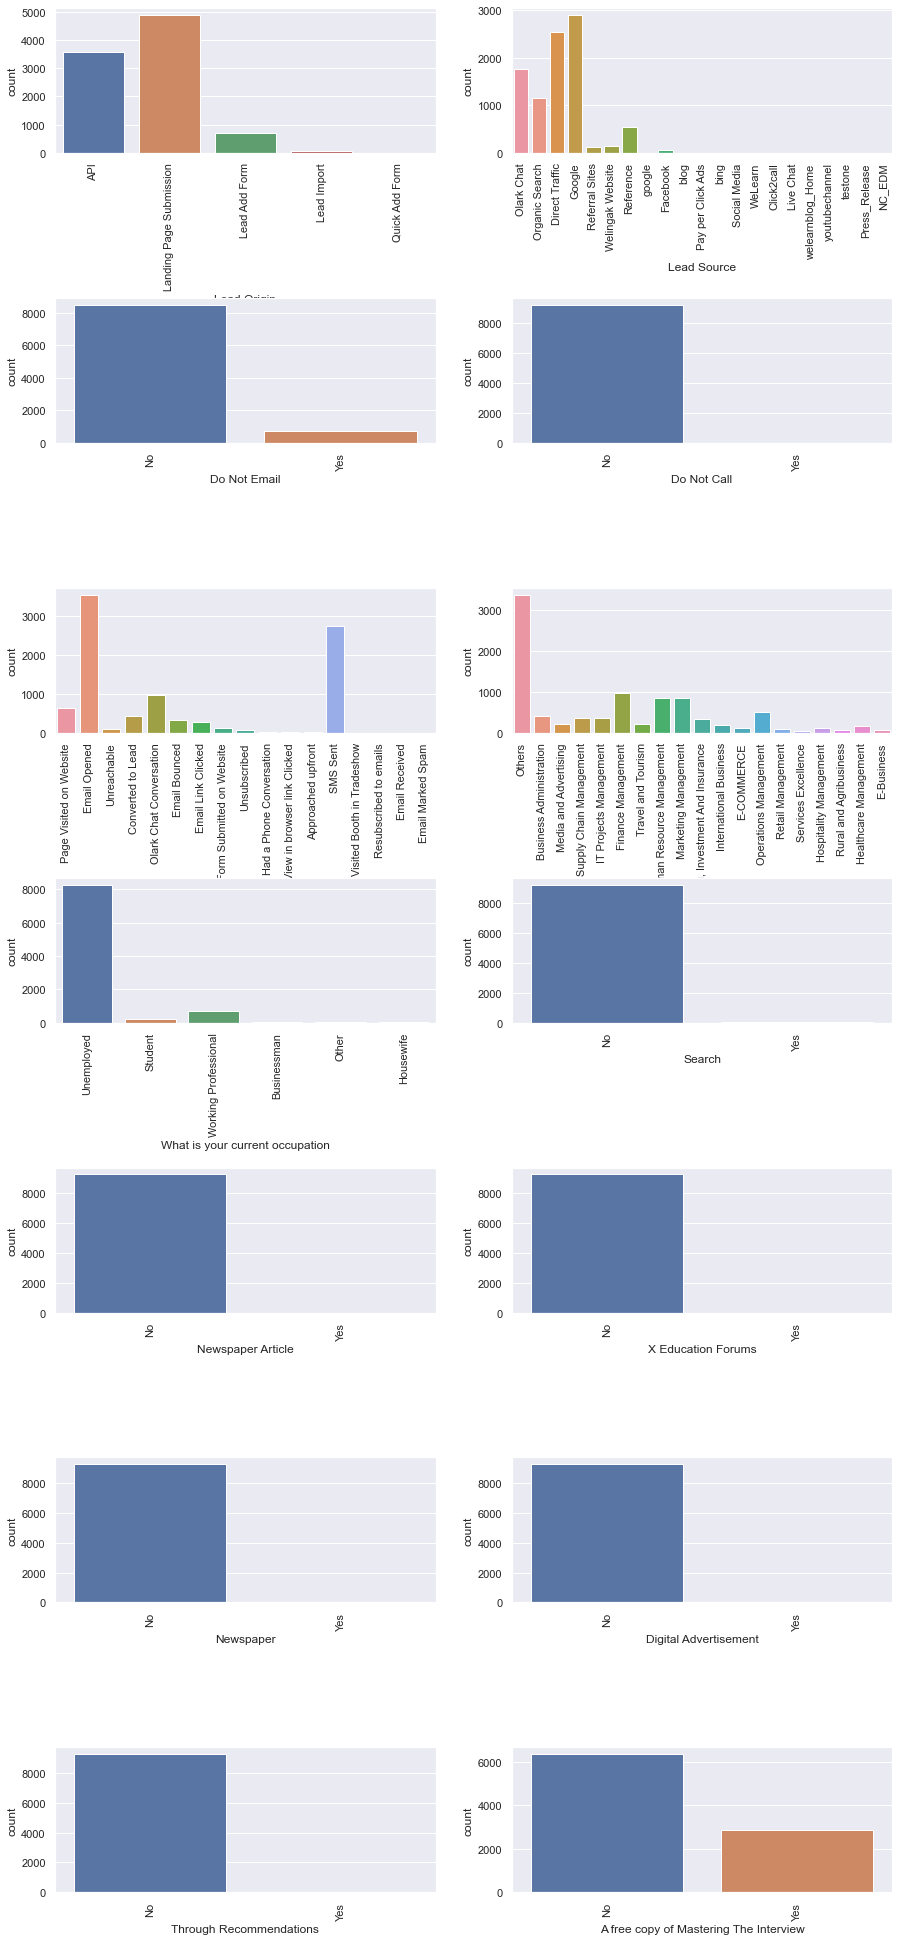

In [38]:
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = lead.select_dtypes(exclude =["number"]).columns.values
plt.figure(figsize=(15,40))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1 )
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    sns.countplot(i[1],data=lead) 
    plt.xticks(rotation=90)
plt.show()

#### Insights:-
'Search', 'Do Not Call', 'Newspaper', 'Newspaper Article', 'Digital Advertisement','X Education Forums', 'Through Recommendation' column's data is highly skewed. Hence we will drop these columns as they will not add any value to the model.

In [39]:
print("Before Drop: ",lead.shape)
lead.drop(['Search', 'Do Not Call', 'Newspaper', 'Newspaper Article', 'Digital Advertisement','X Education Forums', 'Through Recommendations'],axis=1,inplace=True)
print("After Drop: ",lead.shape)

Before Drop:  (9240, 18)
After Drop:  (9240, 11)


### 3.7 Checking for Total Percentage of Rows Retained?

In [40]:
print("Shape of the data frame: ",lead.shape)

Shape of the data frame:  (9240, 11)


#### No rows have been dropped. 100% of them are retained

## 4. EDA/ Data Visualization

In [41]:
# Reusable function for visualization
def create_pie_plot(Column,dataframe):
    #lables = dataframe[Column].value_counts()
    #lables = list(pd.unique(dataframe[Column]))
    lables = ['No','Yes']
    #explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Very good')
    plt.figure(figsize = [6,6])

    #dataframe[Column].value_counts()
    plt.pie(dataframe[Column].value_counts(), labels=lables, autopct='%1.1f%%', 
            textprops={'fontsize': 15, 'fontweight' : 15, 'color' : 'Black'}, startangle=90,labeldistance=1.05)
    #plt.legend(bbox_to_anchor=(1,0), loc="center right", fontsize=12, bbox_transform=plt.gcf().transFigure)
    plt.legend(bbox_to_anchor=(1, 0, 0.5, 1), loc="center left", fontsize=12, bbox_transform=plt.gcf().transFigure)
   
    title = "Distribution of "+ Column.title() + " Variable"
    plt.title(title, fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

    plt.show()

In [42]:
# function for plotting repetitive countplots in univariate categorical analysis on the lead dataset
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t Converted; 
# 2. Percentage of converted leads within column

def univariate_categorical(feature,label_rotation=False,horizontal_layout=True):
    temp_count = lead[feature].value_counts()
    temp_perc = lead[feature].value_counts(normalize = True)
    df1 = pd.DataFrame({feature: temp_count.index,'Total Leads': temp_count.values,'% Values': temp_perc.values * 100})
    print(df1)
    
    # Calculate the percentage of Converted=1 per category value
    cat_perc = lead[[feature, 'Converted']].groupby([feature],as_index=False).mean()
    cat_perc["Converted"] = cat_perc["Converted"]*100
    cat_perc.sort_values(by='Converted', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))   
    # 1. Subplot 1: Count plot of categorical column
    sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=lead,
                    hue ="Converted",
                    order=cat_perc[feature],
                    palette=['r','g'])

    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    ax1.legend(['Not Converted','Converted'])
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='Converted', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Converted leads [%]', fontsize=15)
    plt.xlabel(feature,fontsize=15) 
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + "( Converted % )", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

### 4.1 Checking for Data imbalance

In [43]:
round(lead['Converted'].value_counts()/lead.shape[0]*100,2)

0    61.46
1    38.54
Name: Converted, dtype: float64

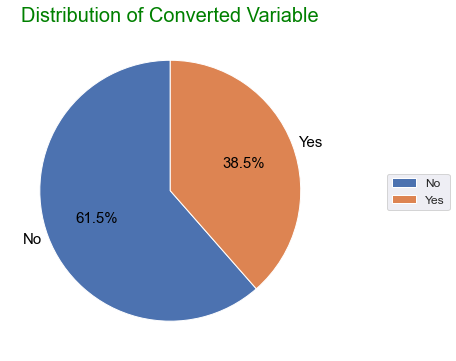

In [44]:
# Distribution based on Contract Type of Loan - Revolving or Cash Loans
create_pie_plot('Converted',lead)

##### 38.5% of  the customers have converted to leads where as 61.5% did not convert to a lead. It is not a well balanced dataset

### 4.2 Univariate Analysis - Categorical

####  Renaming Large Column Names for better Visualization graphs

In [45]:
# Some of the column names are large, hence the visualization graphs may look
# Renaming some of the column headers which has long header

lead.rename(columns={'What is your current occupation': 'Occupation', 
                     'A free copy of Mastering The Interview': 'Free Copy'                   
                    },inplace = True)
print(lead.columns)
print(lead.shape)

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'Occupation', 'Free Copy'],
      dtype='object')
(9240, 11)


In [46]:
categorical_col = lead.select_dtypes(exclude =["number"]).columns.values
print("Dataset has following Categorical Columns : \n \n {} \n\n".format(categorical_col))

Dataset has following Categorical Columns : 
 
 ['Lead Origin' 'Lead Source' 'Do Not Email' 'Last Activity'
 'Specialization' 'Occupation' 'Free Copy'] 




#### 4.1 Lead Origin

               Lead Origin  Total Leads   % Values
0  Landing Page Submission         4886  52.878788
1                      API         3580  38.744589
2            Lead Add Form          718   7.770563
3              Lead Import           55   0.595238
4           Quick Add Form            1   0.010823


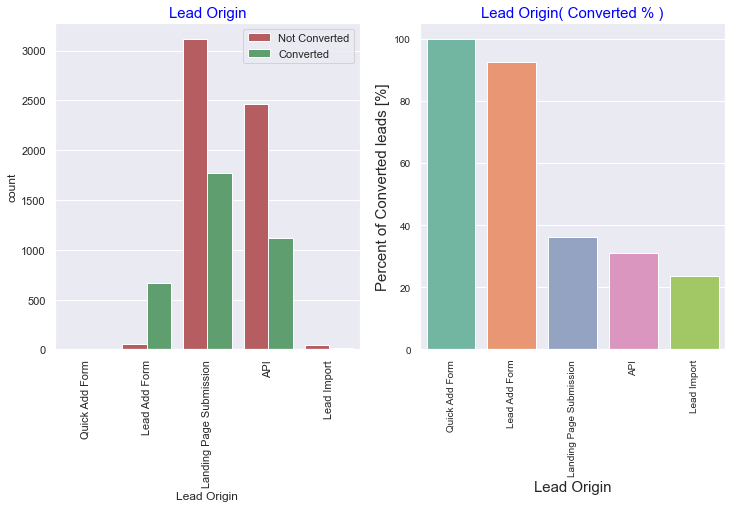

In [47]:
#Run the function to get plot categorical plots 
univariate_categorical("Lead Origin",label_rotation=True)

#### Insights:-
1. Most Leads are from "Landing Page submissions" out of which around 38% got converted, followed by "API", where around 32% got converted.
2. "Lead Add Form" leads have the third most conversions. The conversion rate is about 90%.
3. "Lead Import" has only 55 records with the lowest conversion rate of around 22%
4. "Quick Add Form" converts 100% with just 1 lead from this category.

#### To improve overall lead conversion rate, we should work on 
1. improving lead converion of "API" and "Landing Page Submission origin"
2. Generating more leads from "Lead Add Form" and "Quick Add Form"

#### 4.2 Lead Source

          Lead Source  Total Leads   % Values
0              Google         2904  31.428571
1      Direct Traffic         2543  27.521645
2          Olark Chat         1755  18.993506
3      Organic Search         1154  12.489177
4           Reference          534   5.779221
5    Welingak Website          142   1.536797
6      Referral Sites          125   1.352814
7            Facebook           55   0.595238
8                bing            6   0.064935
9              google            5   0.054113
10         Click2call            4   0.043290
11      Press_Release            2   0.021645
12       Social Media            2   0.021645
13          Live Chat            2   0.021645
14     youtubechannel            1   0.010823
15            testone            1   0.010823
16  Pay per Click Ads            1   0.010823
17   welearnblog_Home            1   0.010823
18            WeLearn            1   0.010823
19               blog            1   0.010823
20             NC_EDM            1

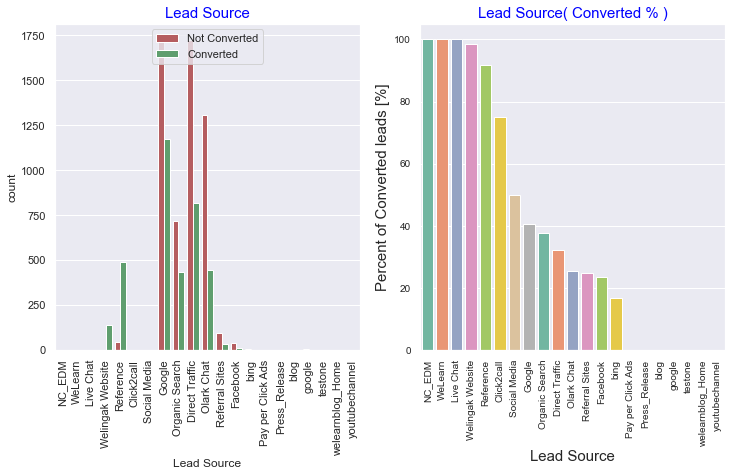

In [48]:
#Run the function to get plot categorical plots
univariate_categorical("Lead Source",label_rotation=True)

#### Insight:-
1. The primary source of leads was "Google" with a conversion rate that averaged 40%.
2. "Direct Traffic","Organic search" and "Olark chat" come next with around 32%, 38% and 28% conversion rate, respectively.
3. A lead that came from a "reference" has over 90% conversion even though the number of such cases is just 534.This option should be explored more to increase lead conversion.
4. Welingak Website has an impressive 98% lead conversion rate, and we believe there is potential to increase this number even further by exploring this option more.

#### To increase lead count, we should encourage and give rewards to existing members who bring referrals. The conversion rate for referrals is 90%.

#### 4.3 Do Not Email

  Do Not Email  Total Leads   % Values
0           No         8506  92.056277
1          Yes          734   7.943723


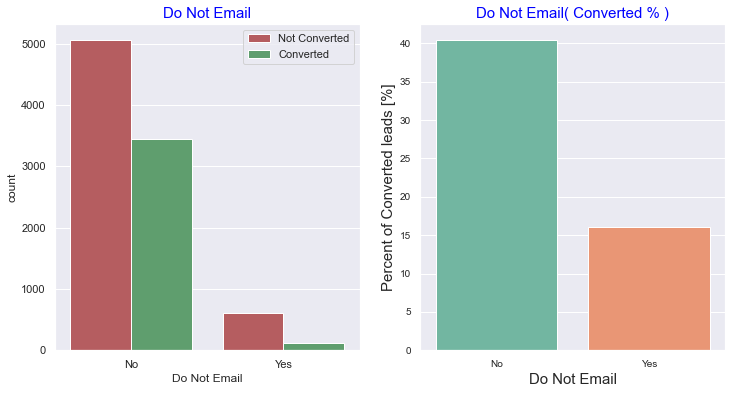

In [49]:
#Run the function to get plot categorical plots
univariate_categorical("Do Not Email")

#### Insight:

1. Majority of people (approx 92%) are fine with receiving email.
2. People who are ok with email have a conversion rate of 40%
3. People who have opted out of receiving email have a lower number of records and also have rate of conversion (only 15%)

#### 4.4 Last Activity

                   Last Activity  Total Leads   % Values
0                   Email Opened         3540  38.311688
1                       SMS Sent         2745  29.707792
2        Olark Chat Conversation          973  10.530303
3        Page Visited on Website          640   6.926407
4              Converted to Lead          428   4.632035
5                  Email Bounced          326   3.528139
6             Email Link Clicked          267   2.889610
7      Form Submitted on Website          116   1.255411
8                    Unreachable           93   1.006494
9                   Unsubscribed           61   0.660173
10      Had a Phone Conversation           30   0.324675
11            Approached upfront            9   0.097403
12  View in browser link Clicked            6   0.064935
13                Email Received            2   0.021645
14             Email Marked Spam            2   0.021645
15    Visited Booth in Tradeshow            1   0.010823
16        Resubscribed to email

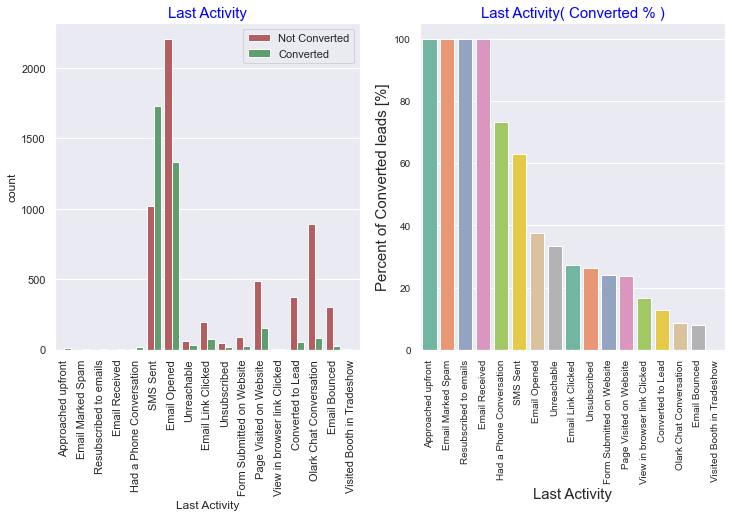

In [50]:
#Run the function to get plot categorical plots
univariate_categorical("Last Activity",label_rotation=True)

#### Insight:
1. "Email opened" is the last activity for most of the leads with conversion rate 38%.
2. "SMS Sent" is the second highest last activity with Conversion rate of around 62%
3. We can considering all other smaller Last Activity types as Other Activity.

#### 4.5 Specialization

                       Specialization  Total Leads   % Values
0                              Others         3380  36.580087
1                  Finance Management          976  10.562771
2           Human Resource Management          848   9.177489
3                Marketing Management          838   9.069264
4               Operations Management          503   5.443723
5             Business Administration          403   4.361472
6              IT Projects Management          366   3.961039
7             Supply Chain Management          349   3.777056
8   Banking, Investment And Insurance          338   3.658009
9                  Travel and Tourism          203   2.196970
10              Media and Advertising          203   2.196970
11             International Business          178   1.926407
12              Healthcare Management          159   1.720779
13             Hospitality Management          114   1.233766
14                         E-COMMERCE          112   1.212121
15      

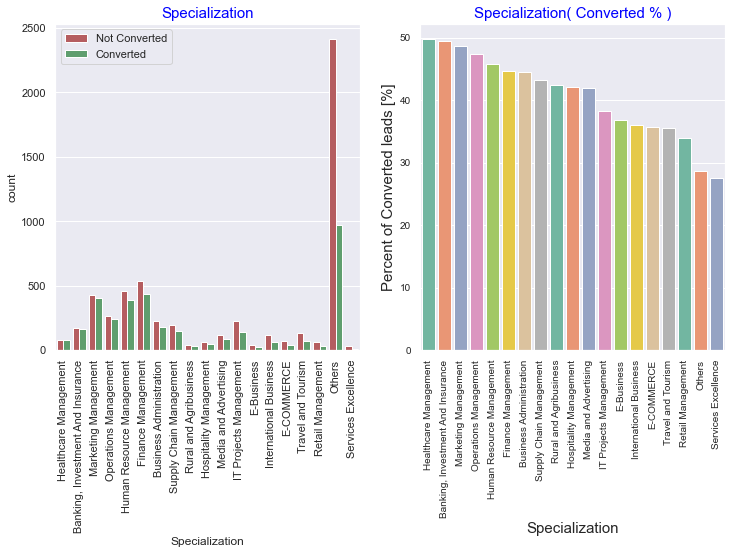

In [51]:
#Run the function to get plot categorical plots
univariate_categorical("Specialization",label_rotation=True)

##### Insight:
1. Most of the leads are in "Others" specialization category and around 28% of those conversion rate
2. Leads with "Finance management" and "Marketing Management" and "Human Resource Management" are the next best specialization categories even though their numbers are in 3 digit figures but their conversion rate varies between 40-45%.

#### 4.6 Occupation

             Occupation  Total Leads   % Values
0            Unemployed         8290  89.718615
1  Working Professional          706   7.640693
2               Student          210   2.272727
3                 Other           16   0.173160
4             Housewife           10   0.108225
5           Businessman            8   0.086580


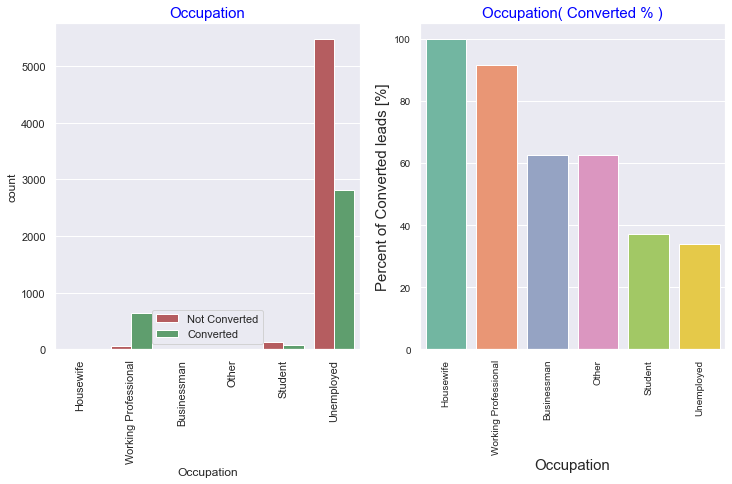

In [52]:
#Run the function to get plot categorical plots
univariate_categorical("Occupation",label_rotation=True)

#### Insight:
1. Though Housewives are very few in numbers, they have 100% conversion rate, so we should try to increase their numbers
2. Working professionals, Businessmen and Other category have high conversion rate
3. Though Unemployed people have been contacted in the highest number, the conversion rate is low (~40%)
4. We cannot combine smaller value categories as their conversion rate is very different. Combing them may lead to wrong predictions.

#### 4.7 Free Copy

  Free Copy  Total Leads   % Values
0        No         6352  68.744589
1       Yes         2888  31.255411


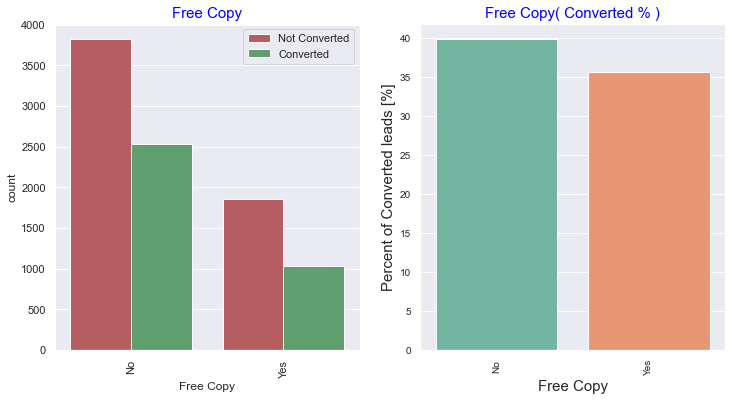

In [53]:
#Run the function to get plot categorical plots
univariate_categorical("Free Copy",label_rotation=True)

#### Insight:-
1. The data shows that whether or not someone received a Free copy of Mastering Interview doesn't affect the results, so this column isn't useful. We will remove it from the analysis.

### 4.3 Univariate Analysis - Numerical

In [54]:
numerical_col = lead.select_dtypes(include =["number"]).columns.values
print("Dataset has following Numerical Columns : \n \n {} \n\n".format(numerical_col))

Dataset has following Numerical Columns : 
 
 ['Converted' 'TotalVisits' 'Total Time Spent on Website'
 'Page Views Per Visit'] 




<Figure size 1440x1080 with 0 Axes>

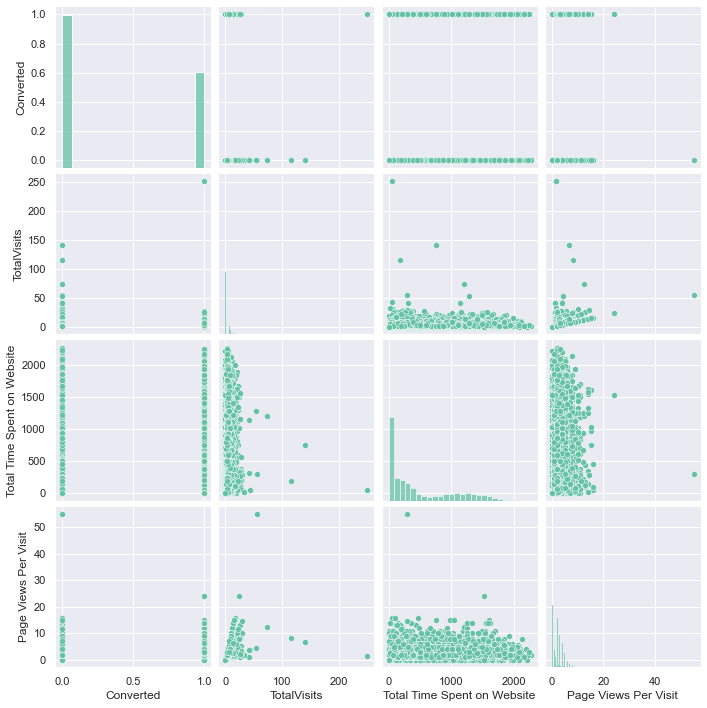

In [55]:
plt.figure(figsize=(20, 15))
sns.pairplot(lead[numerical_col])
plt.show()

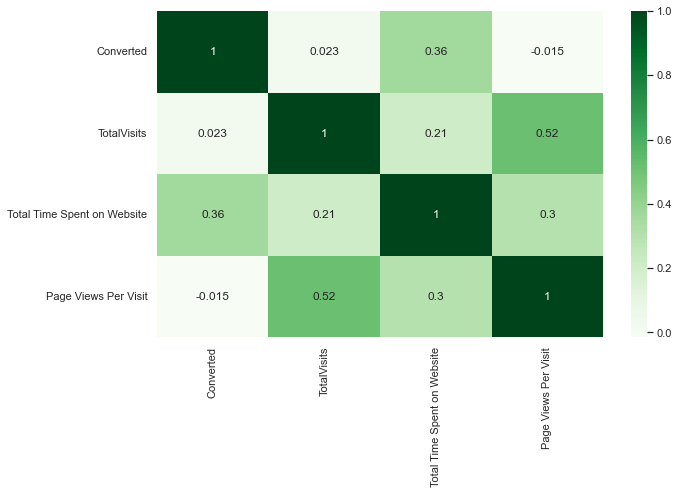

In [56]:
plt.figure(figsize=(10,6))
sns.heatmap(lead.corr(),annot=True,cmap="Greens")
plt.show()

#### TotalVisits and Page Per Visit are related. We'll keep these columns for now and remove them during the modelling phase by checking VIF.

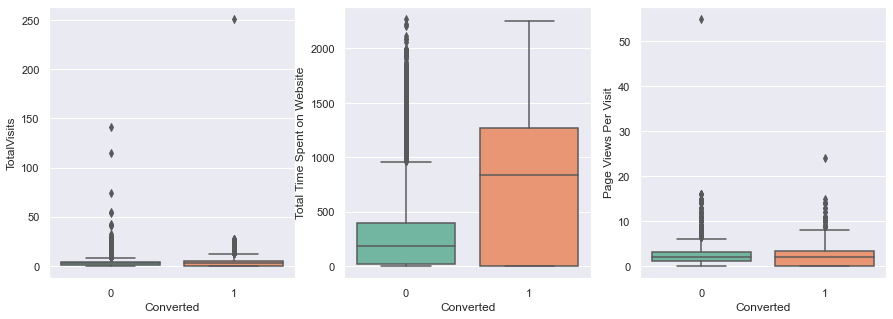

In [57]:
# Build boxplot of all numerical variables (before creating dummies) againt the target variable 'Converted' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead)
plt.subplot(1,3,2)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead)
plt.subplot(1,3,3)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead)
plt.show()

#### Insights:-
1. TotalVisits: It has some outliers which needs to be treated.
2. Total Time Spent on Website: People whose spend more time has higher chance of getting converted. 
3. Page Views Per Visit: It has some outliers which needs to be treated.

### 4.4 Bivariate  Analysis

#### 4.4.1 Bivariate for Categorical Variables

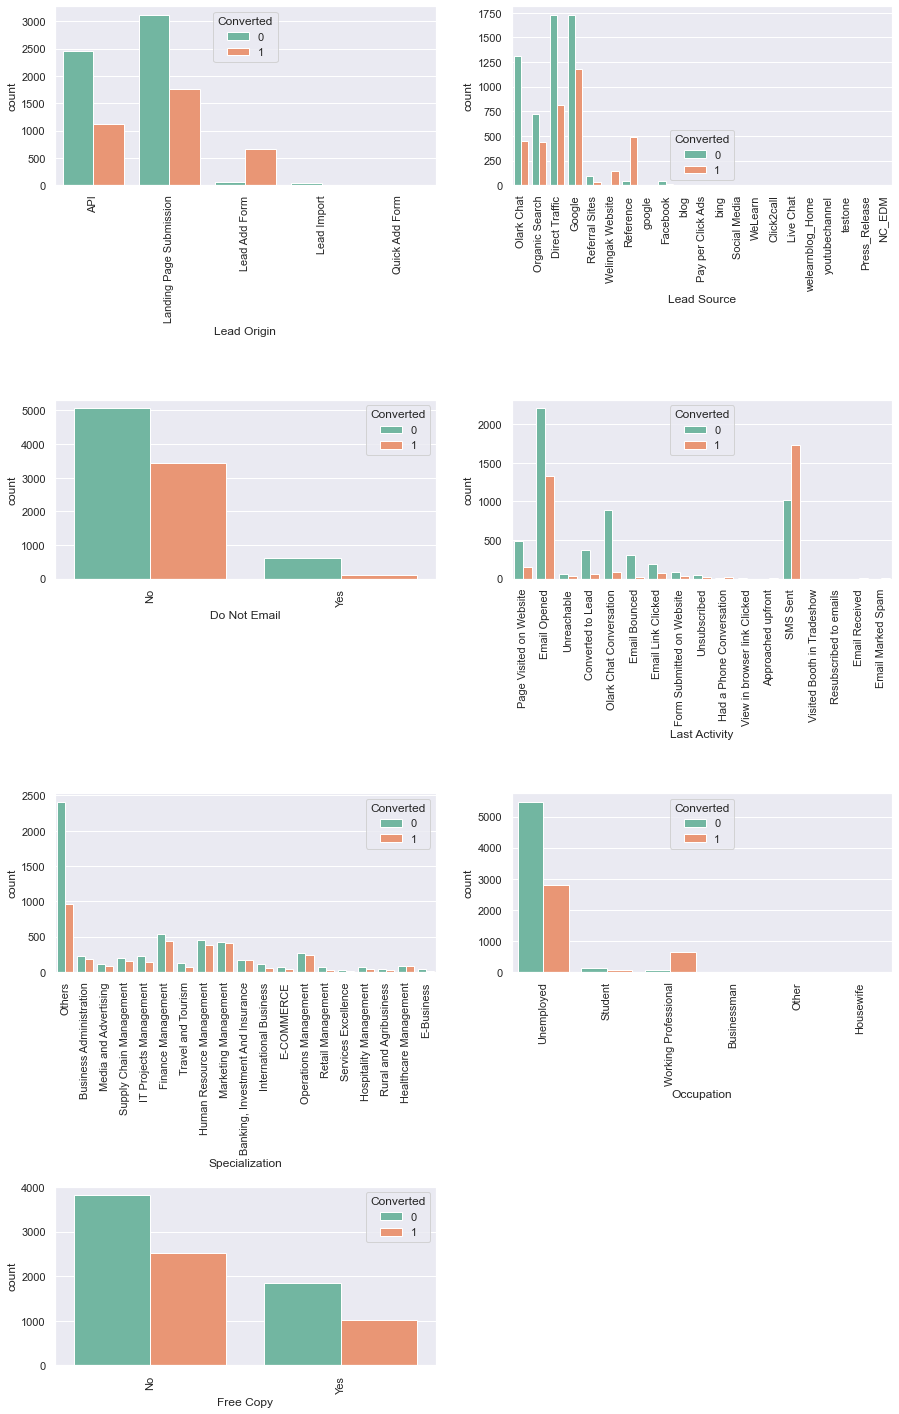

In [58]:
plt.figure(figsize=(15,25))
plt.subplots_adjust(wspace=.2,hspace=1.2 )
for i in enumerate(categorical_col):
    plt.subplot(4,2, i[0]+1)
    sns.countplot(x = i[1],hue = 'Converted', data = lead)
    plt.xticks(rotation=90)
plt.show()

#### Insights:-

1. Lead Original: Higher leads in "Landing Page Submission" and "API" category
2. Lead Source: leads are higher in "Direct Traffic" and "Google" Category.
3. Do not email: No has higher converted as well as non-converted population.
4. Last Activity: The number of Hot leads is higher in SMS and in email category.
5. Most of the leads come from Finance management.
6. Occupation: Mostly unemployed population is attributed to the site, so they have higher converted as well as non-converted population than others.
7. Free Copy: Seems to have no significant impact as converted as well as non-converted populations are distributed across both categories. We can keep it for now and see its behavior during the modeling step


#### 4.4.2 Bivariate for Numerical Variables

<Figure size 1440x1440 with 0 Axes>

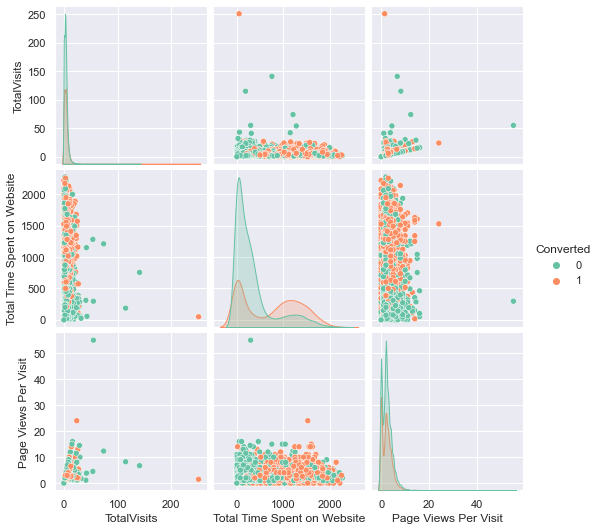

In [59]:
plt.figure(figsize =(20,20))
sns.pairplot(lead[numerical_col],hue="Converted",kind='scatter')                                  
plt.show()

Data is not normally distributed.

## 5. Data Standardization

### 5.1 Dropping redundant columns

In [60]:
# We decided during univariate EDA that Free-Copy of Mastering Interview doesn't seem to have much variance 
# if free copy is given or not, so this column is not adding any value to our analysis, hence we will drop it.
lead.drop('Free Copy',axis = 1, inplace = True)
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'Occupation'],
      dtype='object')

### 5.2 Outlier Treatment

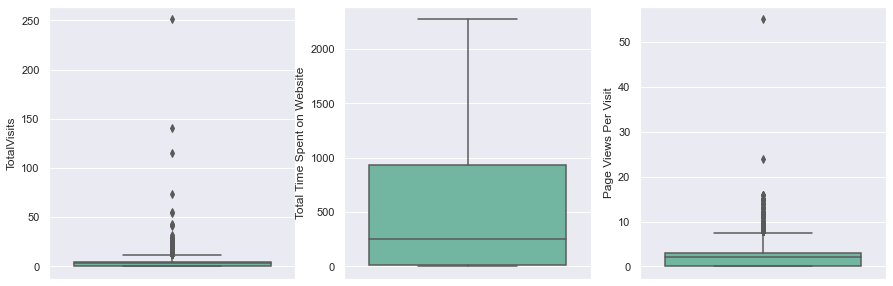

In [61]:
# Build boxplot of all numerical variables 
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', data = lead)
plt.subplot(1,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = lead)
plt.subplot(1,3,3)
sns.boxplot(y = 'Page Views Per Visit', data = lead)
plt.show()

In [62]:
#Checking the detailed percentile values
lead.describe(percentiles=[.10,.25,.50,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000


In [63]:
print(lead.shape)
print("Total number of rows above 95 percentile for TotalVisits column:",len(lead[lead['TotalVisits'] >= lead['TotalVisits'].quantile(0.95)]))
print("Total number of rows above 95 percentile for Page Views Per Visit column:",len(lead[lead['Page Views Per Visit'] >= lead['Page Views Per Visit'].quantile(0.95)]))

(9240, 10)
Total number of rows above 95 percentile for TotalVisits column: 467
Total number of rows above 95 percentile for Page Views Per Visit column: 604


#### Insights:-

Records with outliers in "TotalVisits" and "Page Views Per Visit" are valid values. However, using them as-is can misclassify the outcomes and cause problems when using Logistic Regression. This is because Logistic Regression is heavily influenced by outliers.

We will cap the "TotalVisits" and "Page Views Per Visit" columns to their 95th percentile. For the TotalVisits column, 467 out of 9240 records are above the 95th percentile. For the Page Views Per Visit column, 604 out of 9240 records are above the 95th percentile.

In [64]:
#Capping the data at 95% percentile
lead.loc[lead['TotalVisits'] >= lead['TotalVisits'].quantile(0.95), 'TotalVisits'] = lead['TotalVisits'].quantile(0.95) # outlier capping
lead.loc[lead['Page Views Per Visit'] >= lead['Page Views Per Visit'].quantile(0.95), 'Page Views Per Visit'] = lead['Page Views Per Visit'].quantile(0.95) # outlier capping

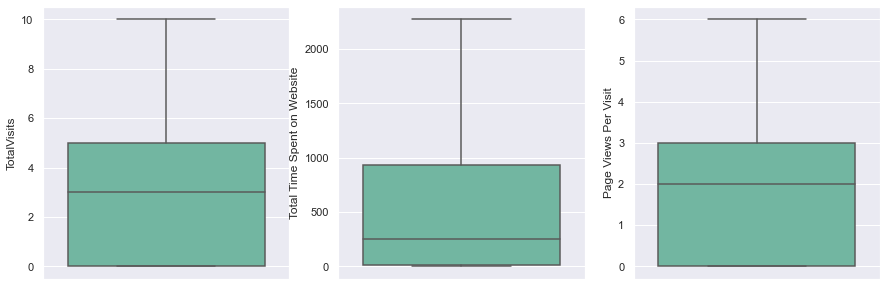

In [65]:
# Build boxplot of all numerical variables 
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', data = lead)
plt.subplot(1,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = lead)
plt.subplot(1,3,3)
sns.boxplot(y = 'Page Views Per Visit', data = lead)
plt.show()

In [66]:
#Checking the detailed percentile values
lead.describe(percentiles=[.10,.25,.50,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.134740,487.698268,2.225451
std,0.486714,2.787787,548.021466,1.800023
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000


Insight:-
Looks good now, The number of rows getting capped are quite high. This is also the reason that we are capping the data instead of deleting it.

### 5.3 Checking on Binary Categorical variables

In [67]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed


In [68]:
# Checking the categorical values for 'Do Not Email'
lead['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [69]:
# 'Do Not Email' is the only variable to be mapped

# Defining the map function
def binary_conv(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the lead YES/NO variable list
lead['Do Not Email'] = lead[['Do Not Email']].apply(binary_conv)

In [70]:
# Checking the categorical values for 'Do Not Email'
lead['Do Not Email'].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

### 5.4 Checking on other Categorical variables

During EDA we observed that there are many categories with very few number of records for "Lead Score" and "Last Activity" columns, so We will combine them in "Others" categories, so that when we create dummy variables we dont end up having unneccessary columns

In [71]:
# Lead Source  - grouping under "Other Sources"
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other Sources')

In [72]:
lead['Lead Source'].value_counts()

Google              2904
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Other Sources         23
google                 5
Name: Lead Source, dtype: int64

In [73]:
# Last Activity - grouping under "Other Activity"
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

In [74]:
lead['Last Activity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Other Activity                 51
Name: Last Activity, dtype: int64

### 5.5 Checking Data-type of columns

In [75]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Occupation                   9240 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.0+ MB


Data types looks appropriate, No change is required

### 5.6 Creating Dummy Variables

In [76]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed


In [77]:
dummy = pd.get_dummies(lead[['Lead Origin', 'Lead Source','Last Activity', 'Specialization','Occupation']], drop_first=True)
lead = pd.concat([lead, dummy],axis=1)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0


In [78]:
# We have created dummies for the below variables, so we can drop them
lead = lead.drop(['Lead Origin', 'Lead Source','Last Activity', 'Specialization','Occupation'], axis=1)
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 6   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 7   Lead Origin_Lead Import                   9240 non-null   uint8  
 8   Lead Origin_Quick Add Form                9240 non-null   uint8  
 9   Lead Source_Facebook                      9240 non-null   uint8  
 10  Lead Source_Google                  

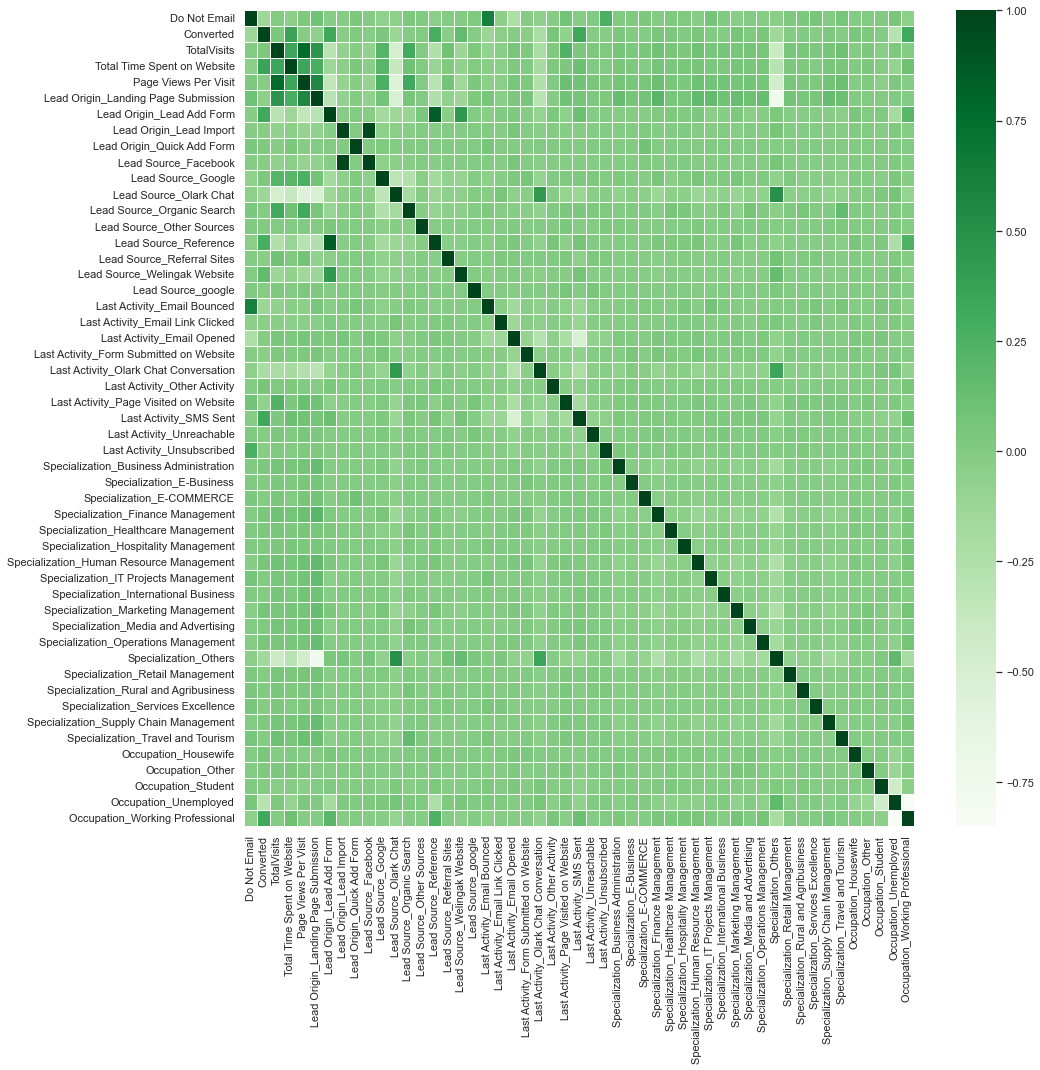

In [79]:
# Visualizing the data using heatmap
plt.figure(figsize=[15,15])
sns.heatmap(lead.corr(), cmap="Greens",linewidth =1)
plt.show()

In [80]:
lead.shape

(9240, 51)

After Dummy variable creation now we havd 51 columns. Due to large number of columns Heat map isn't being helpfu. We will go ahead with next steps now

## 6. Data Preparation

### 6.1 Train-Test Split

In [81]:
y=lead['Converted']
X=lead.drop(['Converted'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70,test_size=0.30,random_state=100)

In [82]:
#Checking the shape of the created Train & Test DFs
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)

 Shape of X_train is :  (6468, 50)
 Shape of y_train is :  (6468,)
 Shape of X_test is  :  (2772, 50)
 Shape of y_test is  :  (2772,)


### 6.2 Feature Scaling

In [83]:
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.078386,3.126933,483.875850,2.214918,0.528139,0.079468,0.005102,0.000155,0.005102,0.320037,...,0.010823,0.007267,0.004793,0.037570,0.021336,0.001391,0.001237,0.021027,0.897805,0.077613
std,0.268799,2.787256,546.565663,1.794032,0.499246,0.270489,0.071252,0.012434,0.071252,0.466527,...,0.103475,0.084940,0.069069,0.190168,0.144512,0.037279,0.035150,0.143484,0.302929,0.267582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,3.000000,246.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,5.000000,926.500000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,10.000000,2272.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
scaler= StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
count,6468.000000,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.078386,6.663398e-17,-1.609377e-16,2.382482e-17,0.528139,0.079468,0.005102,0.000155,0.005102,0.320037,...,0.010823,0.007267,0.004793,0.037570,0.021336,0.001391,0.001237,0.021027,0.897805,0.077613
std,0.268799,1.000077e+00,1.000077e+00,1.000077e+00,0.499246,0.270489,0.071252,0.012434,0.071252,0.466527,...,0.103475,0.084940,0.069069,0.190168,0.144512,0.037279,0.035150,0.143484,0.302929,0.267582
min,0.000000,-1.121955e+00,-8.853708e-01,-1.234699e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-1.121955e+00,-8.634138e-01,-1.234699e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,-4.554387e-02,-4.352528e-01,-1.198054e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,6.720633e-01,8.098906e-01,4.376415e-01,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,2.466081e+00,3.271816e+00,2.109982e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Train-Test split and Feature Scaling is done, Now will start the model building process

## 7. Building Logistic Regresion Model

We will be using the Logistic Regression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

### 7.1 RFE (Recursive Feature Elimination)

In [85]:
# Using RFE to reduce the feature count from 50 to 15
logreg = LogisticRegression()
rfe = RFE(logreg, 15)           
rfe = rfe.fit(X_train, y_train)

In [86]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 12),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 22),
 ('Lead Origin_Quick Add Form', False, 17),
 ('Lead Source_Facebook', False, 6),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 27),
 ('Lead Source_Other Sources', False, 14),
 ('Lead Source_Reference', False, 15),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_google', False, 10),
 ('Last Activity_Email Bounced', False, 34),
 ('Last Activity_Email Link Clicked', False, 13),
 ('Last Activity_Email Opened', False, 2),
 ('Last Activity_Form Submitted on Website', False, 31),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Activity', True, 1),
 ('Last Activity_Page Visited on

In [87]:
#Columns which have been removed in RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Other Sources', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_google',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',


In [88]:
#checking for remaining columns after RFE
selected_cols = X_train.columns[rfe.support_]
selected_cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Occupation_Housewife',
       'Occupation_Working Professional'],
      dtype='object')

In [89]:
X_train_rfe=X_train[selected_cols]
X_train_rfe.shape

(6468, 15)

### 7.2 Manual Feature Reduction

In [90]:
# Creating a reusable function for VIF Calculation
def calculate_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [91]:
# Reusable function for WOE and IV calculation
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

#### 7.2.1 MODEL 1

In [92]:
calculate_VIF(X_train_rfe)

,Features,VIF
4,Lead Source_Olark Chat,2.03
12,Specialization_Others,1.99
8,Last Activity_SMS Sent,1.53
3,Lead Origin_Lead Add Form,1.48
6,Last Activity_Olark Chat Conversation,1.46
2,Lead Origin_Landing Page Submission,1.45
5,Lead Source_Welingak Website,1.26
1,Total Time Spent on Website,1.24
14,Occupation_Working Professional,1.19
0,Do Not Email,1.17


In [93]:
logm1 = sm.GLM(y_train,sm.add_constant(X_train_rfe), family = sm.families.Binomial()).fit()
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2710.8
Date:                Tue, 09 Aug 2022   Deviance:                       5421.6
Time:                        16:25:17   Pearson chi2:                 9.18e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

#### We will remove 'Occupation_Housewife' because it has really high P-value of 0.999

In [94]:
print(X_train_rfe.shape) # shape of data frame before dropping
X_train_rfe = X_train_rfe.drop(['Occupation_Housewife'],axis=1) # dropping Occupation_Housewife column
print(X_train_rfe.shape)# shape of data frame after dropping

(6468, 15)
(6468, 14)


#### 7.2.2 MODEL 2

In [95]:
calculate_VIF(X_train_rfe)

,Features,VIF
4,Lead Source_Olark Chat,2.03
12,Specialization_Others,1.99
8,Last Activity_SMS Sent,1.53
3,Lead Origin_Lead Add Form,1.47
6,Last Activity_Olark Chat Conversation,1.46
2,Lead Origin_Landing Page Submission,1.45
5,Lead Source_Welingak Website,1.26
1,Total Time Spent on Website,1.24
13,Occupation_Working Professional,1.19
0,Do Not Email,1.17


In [96]:
logm2 = sm.GLM(y_train,sm.add_constant(X_train_rfe), family = sm.families.Binomial()).fit()
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2718.1
Date:                Tue, 09 Aug 2022   Deviance:                       5436.2
Time:                        16:25:17   Pearson chi2:                 9.21e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

#### We will remove 'Last Activity_Unreachable' because it has P-value of 0.297 and we are planning to keep columns upto the threadhold of 0.05

In [97]:
print(X_train_rfe.shape) # shape of data frame before dropping
X_train_rfe = X_train_rfe.drop(['Last Activity_Unreachable'],axis=1) # dropping Occupation_Housewife column
print(X_train_rfe.shape)# shape of data frame after dropping

(6468, 14)
(6468, 13)


#### 7.2.3 MODEL 3

In [98]:
calculate_VIF(X_train_rfe)

,Features,VIF
4,Lead Source_Olark Chat,2.03
11,Specialization_Others,1.99
8,Last Activity_SMS Sent,1.53
3,Lead Origin_Lead Add Form,1.47
6,Last Activity_Olark Chat Conversation,1.46
2,Lead Origin_Landing Page Submission,1.44
5,Lead Source_Welingak Website,1.26
1,Total Time Spent on Website,1.24
12,Occupation_Working Professional,1.19
0,Do Not Email,1.17


In [99]:
logm3 = sm.GLM(y_train,sm.add_constant(X_train_rfe), family = sm.families.Binomial()).fit()
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2718.6
Date:                Tue, 09 Aug 2022   Deviance:                       5437.2
Time:                        16:25:18   Pearson chi2:                 9.20e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

All the P values are below 0.05 and VIF is less than 5. So this model can be considered. But lead check IV for these columns 
we got in Model3

#### 7.2.4 MODEL 4

In [100]:
# Checking Information Value of columns
for col in lead.columns:
    if col in X_train_rfe.columns:
        df, iv = calculate_woe_iv(lead, col, 'Converted')
        print('IV score of column : ',col, " is ", round(iv,4))

IV score of column :  Do Not Email  is  0.0954
IV score of column :  Total Time Spent on Website  is  0.6012
IV score of column :  Lead Origin_Landing Page Submission  is  0.0111
IV score of column :  Lead Origin_Lead Add Form  is  0.5615
IV score of column :  Lead Source_Olark Chat  is  0.0763
IV score of column :  Lead Source_Welingak Website  is  0.1853
IV score of column :  Last Activity_Olark Chat Conversation  is  0.2711
IV score of column :  Last Activity_Other Activity  is  0.0115
IV score of column :  Last Activity_SMS Sent  is  0.4467
IV score of column :  Last Activity_Unsubscribed  is  0.002
IV score of column :  Specialization_Hospitality Management  is  0.0003
IV score of column :  Specialization_Others  is  0.1036
IV score of column :  Occupation_Working Professional  is  0.5227


#### We will remove 'Specialization_Hospitality Management ' due to lowest IV value(0.0003) and it also has negative coefficient value.

In [101]:
print(X_train_rfe.shape) # shape of data frame before dropping
X_train_rfe = X_train_rfe.drop(['Specialization_Hospitality Management'],axis=1) # dropping Occupation_Housewife column
#X_train_rfe = X_train_rfe.drop(['Page Views Per Visit'],axis=1) # dropping Occupation_Housewife column
print(X_train_rfe.shape)# shape of data frame after dropping

(6468, 13)
(6468, 12)


In [102]:
calculate_VIF(X_train_rfe)

,Features,VIF
4,Lead Source_Olark Chat,2.03
10,Specialization_Others,1.99
8,Last Activity_SMS Sent,1.53
3,Lead Origin_Lead Add Form,1.46
6,Last Activity_Olark Chat Conversation,1.46
2,Lead Origin_Landing Page Submission,1.42
5,Lead Source_Welingak Website,1.26
1,Total Time Spent on Website,1.24
11,Occupation_Working Professional,1.19
0,Do Not Email,1.17


In [103]:
logm4 = sm.GLM(y_train,sm.add_constant(X_train_rfe), family = sm.families.Binomial()).fit()
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2724.2
Date:                Tue, 09 Aug 2022   Deviance:                       5448.4
Time:                        16:25:25   Pearson chi2:                 9.09e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

#### Model still looks fine with respect to P value and VIF, Checking to see if any more columns can be dropped

#### 7.2.5 MODEL 5

In [104]:
# Checking Information Value of columns again
for col in lead.columns:
    if col in X_train_rfe.columns:
        df, iv = calculate_woe_iv(lead, col, 'Converted')
        print('IV score of column : ',col, " is ", round(iv,4))

IV score of column :  Do Not Email  is  0.0954
IV score of column :  Total Time Spent on Website  is  0.6012
IV score of column :  Lead Origin_Landing Page Submission  is  0.0111
IV score of column :  Lead Origin_Lead Add Form  is  0.5615
IV score of column :  Lead Source_Olark Chat  is  0.0763
IV score of column :  Lead Source_Welingak Website  is  0.1853
IV score of column :  Last Activity_Olark Chat Conversation  is  0.2711
IV score of column :  Last Activity_Other Activity  is  0.0115
IV score of column :  Last Activity_SMS Sent  is  0.4467
IV score of column :  Last Activity_Unsubscribed  is  0.002
IV score of column :  Specialization_Others  is  0.1036
IV score of column :  Occupation_Working Professional  is  0.5227


#### We will remove 'Specialization_Others' because initially there were 36% nulls and all the available categories had almost equal disribution of records, so created a new specialization as "Others" during Data imputation step. It doesnt give any clarity on which specialization it is and it also has negative coefficient value.

In [105]:
print(X_train_rfe.shape) # shape of data frame before dropping
X_train_rfe = X_train_rfe.drop(['Specialization_Others'],axis=1) # dropping Occupation_Housewife column
print(X_train_rfe.shape)# shape of data frame after dropping

(6468, 12)
(6468, 11)


In [106]:
calculate_VIF(X_train_rfe)

,Features,VIF
4,Lead Source_Olark Chat,1.56
8,Last Activity_SMS Sent,1.45
3,Lead Origin_Lead Add Form,1.44
2,Lead Origin_Landing Page Submission,1.41
6,Last Activity_Olark Chat Conversation,1.37
1,Total Time Spent on Website,1.24
5,Lead Source_Welingak Website,1.24
10,Occupation_Working Professional,1.18
0,Do Not Email,1.16
9,Last Activity_Unsubscribed,1.07


In [107]:
logm5 = sm.GLM(y_train,sm.add_constant(X_train_rfe), family = sm.families.Binomial()).fit()
print(logm5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2772.4
Date:                Tue, 09 Aug 2022   Deviance:                       5544.9
Time:                        16:25:33   Pearson chi2:                 8.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

#### 7.2.6 MODEL 6

In [108]:
# Checking Information Value of columns again
for col in lead.columns:
    if col in X_train_rfe.columns:
        df, iv = calculate_woe_iv(lead, col, 'Converted')
        print('IV score of column : ',col, " is ", round(iv,4))

IV score of column :  Do Not Email  is  0.0954
IV score of column :  Total Time Spent on Website  is  0.6012
IV score of column :  Lead Origin_Landing Page Submission  is  0.0111
IV score of column :  Lead Origin_Lead Add Form  is  0.5615
IV score of column :  Lead Source_Olark Chat  is  0.0763
IV score of column :  Lead Source_Welingak Website  is  0.1853
IV score of column :  Last Activity_Olark Chat Conversation  is  0.2711
IV score of column :  Last Activity_Other Activity  is  0.0115
IV score of column :  Last Activity_SMS Sent  is  0.4467
IV score of column :  Last Activity_Unsubscribed  is  0.002
IV score of column :  Occupation_Working Professional  is  0.5227


#### We will remove 'Last Activity_Other Activity' because this is a parameter created by combining smaller categories of Last Activity and number of records in this category is just 51. It also have low IV(0.0115)

In [109]:
print(X_train_rfe.shape) # shape of data frame before dropping
X_train_rfe = X_train_rfe.drop(['Last Activity_Other Activity'],axis=1) # dropping Occupation_Housewife column
print(X_train_rfe.shape)# shape of data frame after dropping"

(6468, 11)
(6468, 10)


In [110]:
calculate_VIF(X_train_rfe)

,Features,VIF
4,Lead Source_Olark Chat,1.56
7,Last Activity_SMS Sent,1.44
3,Lead Origin_Lead Add Form,1.43
2,Lead Origin_Landing Page Submission,1.41
6,Last Activity_Olark Chat Conversation,1.37
1,Total Time Spent on Website,1.24
5,Lead Source_Welingak Website,1.24
9,Occupation_Working Professional,1.17
0,Do Not Email,1.16
8,Last Activity_Unsubscribed,1.07


In [111]:
X_train_rfe = sm.add_constant(X_train_rfe)
logm6 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial()).fit()
print(logm6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2780.1
Date:                Tue, 09 Aug 2022   Deviance:                       5560.2
Time:                        16:25:40   Pearson chi2:                 7.34e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

#### Insight:-
No sign of multicollinearity shown from above vif dataframe hence logm6 is our final model and we are going to use it prediction. All P values are less than 0.05 hence these features impact the dependent variable and this dependency is not just by change

In [112]:
selected_cols = X_train_rfe.columns.values.tolist()
selected_cols

['const',
 'Do Not Email',
 'Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_SMS Sent',
 'Last Activity_Unsubscribed',
 'Occupation_Working Professional']

In [113]:
selected_cols.remove('const')
selected_cols

['Do Not Email',
 'Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_SMS Sent',
 'Last Activity_Unsubscribed',
 'Occupation_Working Professional']

## 8. Model Validation 

In [114]:
# Reusable function for Logistic Regression Metrics
def logistic_regression_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    speci = TN/(TN+FP)
    sensi = TP/(TP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    FPR = FP/(TN + FP)
    FNR = FN/(TP + FN)
    
    print ("True Negative                        : ", TN)
    print ("False Positve                        : ", FP)
    print ("False Negative                       : ", FN)
    print ("True Positive                        : ", TP)
    
    print ("Model Accuracy value is              : ", round(accuracy*100,2),"%")
    print ("Model Sensitivity value is           : ", round(sensi*100,2),"%")
    print ("Model Specificity value is           : ", round(speci*100,2),"%")
    print ("Model Precision value is             : ", round(precision*100,2),"%")
    print ("Model Recall value is                : ", round(recall*100,2),"%")
    print ("Model True Positive Rate (TPR)       : ", round(TPR*100,2),"%")
    print ("Model False Positive Rate (FPR)      : ", round(FPR*100,2),"%")

### 8.1 Predicted Probability Calculation

In [115]:
# Getting the predicted values on the train set
y_train_pred = logm6.predict(X_train_rfe)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22568551, 0.17760239, 0.26455297, 0.77565252, 0.22568551,
       0.9899449 , 0.08861991, 0.99112943, 0.34647229, 0.89553111])

In [116]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted_Orig':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['RecordID'] = y_train.index
y_train_pred_final.head()

,Converted_Orig,Converted_Prob,RecordID
0,0,0.225686,1871
1,0,0.177602,6795
2,0,0.264553,3516
3,0,0.775653,8105
4,0,0.225686,3934


### 8.2 Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

    Specificity = TN/(TN+FP)
    Sensitivity = TP/(TP+FN)

In [117]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted_Orig,Converted_Prob,RecordID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.225686,1871,1,1,1,0,0,0,0,0,0,0
1,0,0.177602,6795,1,1,0,0,0,0,0,0,0,0
2,0,0.264553,3516,1,1,1,0,0,0,0,0,0,0
3,0,0.775653,8105,1,1,1,1,1,1,1,1,0,0
4,0,0.225686,3934,1,1,1,0,0,0,0,0,0,0


In [118]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity','Precision','Recall'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted_Orig, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec, rec, thresholds = precision_recall_curve(y_train_pred_final['Converted_Orig'], y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity, prec[1], rec[1]]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity  Precision    Recall
0.0   0.0  0.381262     1.000000     0.000000   1.000000  0.000000
0.1   0.1  0.575603     0.965937     0.335082   0.472338  0.965937
0.2   0.2  0.724954     0.916058     0.607196   0.589663  0.916058
0.3   0.3  0.790971     0.824818     0.770115   0.688558  0.824818
0.4   0.4  0.810451     0.755069     0.844578   0.749597  0.755069
0.5   0.5  0.807205     0.692620     0.877811   0.777424  0.692620
0.6   0.6  0.790507     0.576642     0.922289   0.820542  0.576642
0.7   0.7  0.774737     0.497972     0.945277   0.848652  0.497972
0.8   0.8  0.743197     0.373074     0.971264   0.888889  0.373074
0.9   0.9  0.712121     0.263585     0.988506   0.933908  0.263585


<Figure size 2160x576 with 0 Axes>

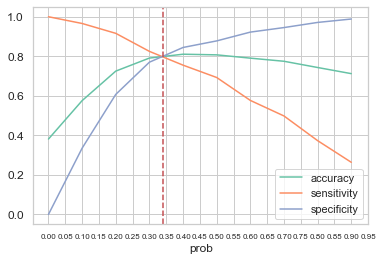

In [119]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(30,8))
sns.set_style("whitegrid")
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.34, color='r', linestyle='--') # additing axline
plt.yticks(size=12)
plt.show()

From the above graph, 0.34 seems to be ideal cut-off points

In [120]:

y_train_pred_final['final_prediction'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.34 else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) # deleting the unnecessary columns
y_train_pred_final.head()

,Converted_Orig,Converted_Prob,RecordID,final_prediction
0,0,0.225686,1871,0
1,0,0.177602,6795,0
2,0,0.264553,3516,0
3,0,0.775653,8105,1
4,0,0.225686,3934,0


### 8.3 Confusion Matrix

In [121]:
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted_Orig, y_train_pred_final.final_prediction )
print("##############################")
print("  Confusion Matrix       ")
print(confusion_matrix)
print("##############################")
logistic_regression_metrics(confusion_matrix)
print("###############################################")

##############################
  Confusion Matrix       
[[3225  777]
 [ 492 1974]]
##############################
True Negative                        :  3225
False Positve                        :  777
False Negative                       :  492
True Positive                        :  1974
Model Accuracy value is              :  80.38 %
Model Sensitivity value is           :  80.05 %
Model Specificity value is           :  80.58 %
Model Precision value is             :  71.76 %
Model Recall value is                :  80.05 %
Model True Positive Rate (TPR)       :  80.05 %
Model False Positive Rate (FPR)      :  19.42 %
###############################################


### F1 Score

In [122]:
print("F1 Score: {}".format(f1_score(y_train_pred_final['Converted_Orig'], y_train_pred_final['final_prediction'])))

F1 Score: 0.7567567567567567


#### Inferences:
Model 6 with cut off value at 0.34 is providing an Sensitivity of 80.05%. Sensitivity in this case indicates how many leads the model identify correctly out of all potential leads which are converting. More than 80% is what the CEO has requested in this case study. Accuracy is 80.55%. F1 Score and precision value in the model has higher number for 0's than 1's. This indicates that the model predicts leads which will not convert ( i.e. filtering leads who will not convert) than the leads which will convert. This indirectly improved the model's performance to identify correct leads to be contacted

### 8.4 ROC Curve

In [123]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [124]:
# recoring the values FPR, TPR and Thresholds:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted_Orig'], y_train_pred_final['Converted_Prob'] , drop_intermediate = False )

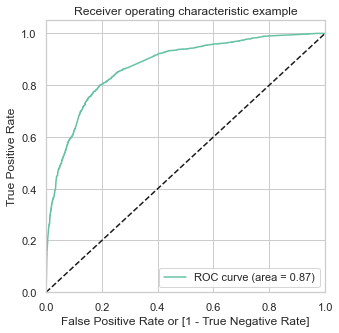

In [125]:
#plotting the ROC curve 
draw_roc(y_train_pred_final['Converted_Orig'], y_train_pred_final['Converted_Prob'])

#### Inferences:
ROC Curve area is 0.87, which indicates that the model is good because the closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

### 8.5 Assigning "Lead Score" to training data set

In [126]:
# Let's assign Lead_score for the leads in Train Data Set
y_train_pred_final['lead_score']=(y_train_pred_final['Converted_Prob']*100).astype("int64")
y_train_pred_final.sort_values(by='Converted_Prob',ascending=False)

,Converted_Orig,Converted_Prob,RecordID,final_prediction,lead_score
3115,1,0.999422,2656,1,99
4891,1,0.999335,8074,1,99
6312,1,0.999005,3428,1,99
2888,1,0.998891,7219,1,99
6187,1,0.998810,7579,1,99
...,...,...,...,...,...
109,0,0.009305,6588,0,0
5487,0,0.009025,8678,0,0
747,0,0.008815,6283,0,0
2722,0,0.006294,7557,0,0


### 8.6 Precision-Recall Trade Off 

In [127]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted_Orig'], y_train_pred_final['Converted_Prob'])

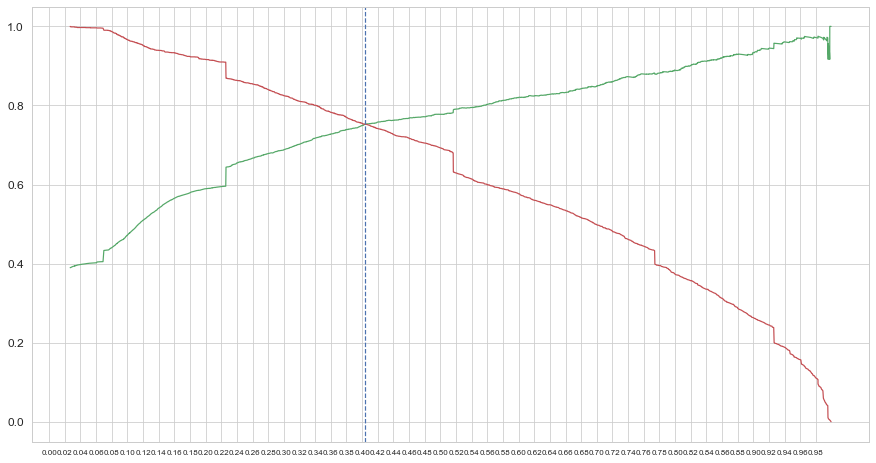

In [128]:
# Plotting the Precision-Recall Trade off Curve
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.404, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=8)
plt.yticks(size=12)

plt.show()

Inferences:
Based on Precision-Recall Trade off curve, the cutoff point seems to 0.404. We will use this threshold to see how it impact the metrics

In [129]:
# plotting the Train dataset again with 0.42 as cutoff
y_train_pred_final['final_prediction_2'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.404 else 0)
y_train_pred_final.head()

,Converted_Orig,Converted_Prob,RecordID,final_prediction,lead_score,final_prediction_2
0,0,0.225686,1871,0,22,0
1,0,0.177602,6795,0,17,0
2,0,0.264553,3516,0,26,0
3,0,0.775653,8105,1,77,1
4,0,0.225686,3934,0,22,0


#### Confusion Matrix after using 0.404 Probability cut off derived using Precision-Recall Trade Off

In [130]:
# Confusion Matrix after using 0.404 Probability cut off
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted_Orig, y_train_pred_final.final_prediction_2 )
print("##############################")
print("  Confusion Matrix       ")
print(confusion_matrix)
print("##############################")
logistic_regression_metrics(confusion_matrix)
print("###############################################")

##############################
  Confusion Matrix       
[[3393  609]
 [ 610 1856]]
##############################
True Negative                        :  3393
False Positve                        :  609
False Negative                       :  610
True Positive                        :  1856
Model Accuracy value is              :  81.15 %
Model Sensitivity value is           :  75.26 %
Model Specificity value is           :  84.78 %
Model Precision value is             :  75.29 %
Model Recall value is                :  75.26 %
Model True Positive Rate (TPR)       :  75.26 %
Model False Positive Rate (FPR)      :  15.22 %
###############################################


#### Formulas
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Specificity = TN/(TN+FP)
Sensitivity = TP/(TP+FN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
TPR = TP/(TP + FN)
TNR = TN/(TN + FP)
FPR = FP/(TN + FP)
FNR = FN/(TP + FN)

### Inferences:-

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. He wants people to be correctly idenfied as leads with 80% success i.e True Positive , True Positive Rate ,Sensitivity, Recall should be close to 80%, which we are getting using the previous cut off of 0.34.  These number decreased by using 0.404 cutoff . Hence we will go for 0.34 cutoff.

## 9. Making Predictions using final model

### 9.1 Scaling Test dataframe

In [131]:
X_test.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.0,2772.000000,2772.000000,...,2772.000000,2772.00000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,0.081890,3.152958,496.617244,2.250029,0.530303,0.073593,0.007937,0.0,0.007937,0.300866,...,0.010823,0.00938,0.003247,0.038240,0.023449,0.000361,0.002886,0.026696,0.895743,0.073593
std,0.274247,2.789444,551.399285,1.814013,0.499171,0.261155,0.088749,0.0,0.088749,0.458717,...,0.103485,0.09641,0.056898,0.191809,0.151351,0.018993,0.053654,0.161221,0.305649,0.261155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,3.000000,258.000000,2.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,5.000000,949.000000,3.500000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,10.000000,2253.000000,6.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [132]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
4269,0,1.748474,0.964504,2.109982,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2376,0,-1.121955,-0.885371,-1.234699,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7766,0,0.672063,-0.777416,1.552535,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
9199,0,-1.121955,-0.885371,-1.234699,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4359,0,-1.121955,-0.885371,-1.234699,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [133]:
X_test.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.0,2772.000000,2772.000000,...,2772.000000,2772.00000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,0.081890,0.009338,0.023314,0.019572,0.530303,0.073593,0.007937,0.0,0.007937,0.300866,...,0.010823,0.00938,0.003247,0.038240,0.023449,0.000361,0.002886,0.026696,0.895743,0.073593
std,0.274247,1.000863,1.008922,1.011216,0.499171,0.261155,0.088749,0.0,0.088749,0.458717,...,0.103485,0.09641,0.056898,0.191809,0.151351,0.018993,0.053654,0.161221,0.305649,0.261155
min,0.000000,-1.121955,-0.885371,-1.234699,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-1.121955,-0.861584,-1.234699,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,-0.045544,-0.413296,-0.119805,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.672063,0.851060,0.716365,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,2.466081,3.237051,2.109982,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 9.2 Prediction using final model

In [134]:
# Selecting only the columns used in final model of Train Dataset
X_test = X_test[selected_cols]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unsubscribed,Occupation_Working Professional
4269,0,0.964504,0,0,0,0,0,1,0,0
2376,0,-0.885371,0,1,0,0,0,1,0,0
7766,0,-0.777416,0,0,0,0,0,0,0,1
9199,0,-0.885371,0,0,1,0,1,0,0,0
4359,0,-0.885371,0,1,0,0,0,0,0,0


In [135]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.columns

Index(['const', 'Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Occupation_Working Professional'],
      dtype='object')

In [136]:
# Predicting the final test model 
y_test_pred = logm6.predict(X_test_sm)
#checking the top 10 rows
y_test_pred[:10]

4269    0.741325
2376    0.926116
7766    0.662400
9199    0.068796
4359    0.773834
9186    0.503461
1631    0.380218
8963    0.151830
8007    0.139852
5324    0.292489
dtype: float64

In [137]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.741325
2376,0.926116
7766,0.662400
9199,0.068796
4359,0.773834


In [138]:
y_test

4269    1
2376    1
7766    1
9199    0
4359    1
       ..
8649    0
2152    1
7101    0
5331    0
2960    1
Name: Converted, Length: 2772, dtype: int64

In [139]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [140]:
# Putting RecordID to index
y_test_df['RecordID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,RecordID,0
0,1,4269,0.741325
1,1,2376,0.926116
2,1,7766,0.662400
3,0,9199,0.068796
4,1,4359,0.773834


In [141]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final= y_pred_final.rename(columns={ 'Converted' : 'Converted_Orig'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['RecordID','Converted_Orig','Converted_Prob'], axis=1)
y_pred_final.head()

,RecordID,Converted_Orig,Converted_Prob
0,4269,1,0.741325
1,2376,1,0.926116
2,7766,1,0.662400
3,9199,0,0.068796
4,4359,1,0.773834


In [142]:
# Using the cut off 0.34 selected during Training
y_pred_final['final_prediction'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

,RecordID,Converted_Orig,Converted_Prob,final_prediction
0,4269,1,0.741325,1
1,2376,1,0.926116,1
2,7766,1,0.662400,1
3,9199,0,0.068796,0
4,4359,1,0.773834,1


## 10. Model Evaluation/Recommedation/Summary

### 10.1 confusion_matrix of Test Model

In [143]:
confusion_matrix = metrics.confusion_matrix(y_pred_final.Converted_Orig, y_pred_final.final_prediction)
print("##############################")
print("  Confusion Matrix       ")
print(confusion_matrix)
print("##############################")
logistic_regression_metrics(confusion_matrix)
print("###############################################")

##############################
  Confusion Matrix       
[[1358  319]
 [ 217  878]]
##############################
True Negative                        :  1358
False Positve                        :  319
False Negative                       :  217
True Positive                        :  878
Model Accuracy value is              :  80.66 %
Model Sensitivity value is           :  80.18 %
Model Specificity value is           :  80.98 %
Model Precision value is             :  73.35 %
Model Recall value is                :  80.18 %
Model True Positive Rate (TPR)       :  80.18 %
Model False Positive Rate (FPR)      :  19.02 %
###############################################


### 10.2 F1 Score of Test Model

In [144]:
print("F1 Score: {}".format(f1_score(y_pred_final['Converted_Orig'], y_pred_final['final_prediction'])))

F1 Score: 0.7661431064572425


### 10.3 ROC for Test Model

In [145]:
# recoring the values FPR, TPR and Thresholds:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final['Converted_Orig'], y_pred_final['Converted_Prob'] , drop_intermediate = False )

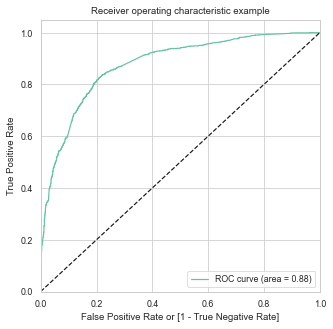

In [146]:
#plotting the ROC curve 
draw_roc(y_pred_final['Converted_Orig'], y_pred_final['Converted_Prob'])

### 10.4 Lead Score Assignment

In [147]:
# Let's assign Lead_score for the leads in Test Data Set : 
y_pred_final['lead_score']=(y_pred_final['Converted_Prob']*100).astype("int64")
y_pred_final.sort_values(by='Converted_Prob',ascending=False)

,RecordID,Converted_Orig,Converted_Prob,final_prediction,lead_score
546,3478,1,0.999382,1,99
745,6383,1,0.999348,1,99
1091,818,1,0.999220,1,99
2405,5921,1,0.998874,1,99
835,4613,1,0.998185,1,99
...,...,...,...,...,...
1530,7974,0,0.016081,0,1
1622,4800,0,0.016081,0,1
17,3545,0,0.008220,0,0
1396,7046,0,0.007988,0,0


In [148]:
# checking the data from top 
y_pred_final.head(5)

,RecordID,Converted_Orig,Converted_Prob,final_prediction,lead_score
0,4269,1,0.741325,1,74
1,2376,1,0.926116,1,92
2,7766,1,0.662400,1,66
3,9199,0,0.068796,0,6
4,4359,1,0.773834,1,77


Inferences:
We can use the lead_score column to identify which potential leads to prioritize first. The higher the score, the higher chances are there for the lead to convert

### 10.5 Finding Top Predicators/Independent Variables

In [149]:
# Let's look into final model features and coefficients 
pd.options.display.float_format = '{:.2f}'.format
final_parameters = logm6.params[1:]
final_parameters

Do Not Email                            -1.51
Total Time Spent on Website              1.08
Lead Origin_Landing Page Submission     -0.25
Lead Origin_Lead Add Form                3.48
Lead Source_Olark Chat                   1.02
Lead Source_Welingak Website             1.97
Last Activity_Olark Chat Conversation   -1.37
Last Activity_SMS Sent                   1.30
Last Activity_Unsubscribed               0.99
Occupation_Working Professional          2.81
dtype: float64

In [150]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

top_predictors = final_parameters
top_predictors = 100.0 * (top_predictors / top_predictors.max())
top_predictors

Do Not Email                            -43.32
Total Time Spent on Website              31.15
Lead Origin_Landing Page Submission      -7.09
Lead Origin_Lead Add Form               100.00
Lead Source_Olark Chat                   29.27
Lead Source_Welingak Website             56.53
Last Activity_Olark Chat Conversation   -39.41
Last Activity_SMS Sent                   37.29
Last Activity_Unsubscribed               28.34
Occupation_Working Professional          80.67
dtype: float64

<Figure size 864x576 with 0 Axes>

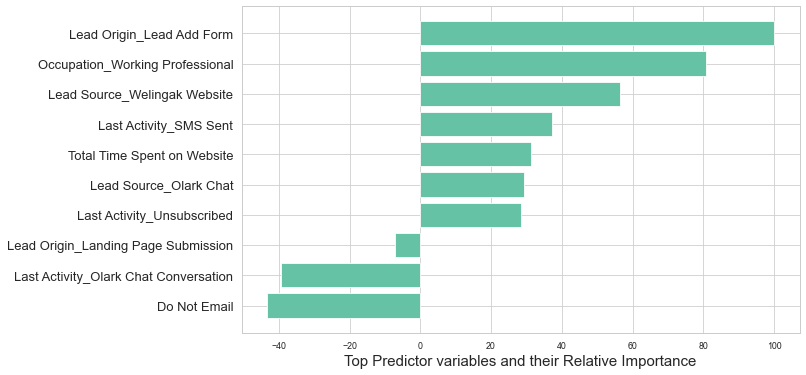

In [151]:
# Plotting the predictors based on their relative importance
top_predictors_sort = np.argsort(top_predictors,kind='quicksort',order='list of str')
fig = plt.figure(figsize = (12,8))
pos = np.arange(top_predictors_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,6))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_predictors[top_predictors_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[selected_cols].columns)[top_predictors_sort], fontsize=13)
ax.set_xlabel('Top Predictor variables and their Relative Importance', fontsize=15)
plt.show()

#### Top Predictors which are impacting leads conversion are :
    - Lead Origin_Lead Add Form
    - What is your current occupation having "Working Professional"
    - Lead Source as "Welingak Website"

### 10.6 Summary

After running the model on the Train and Test Data evaluation metrics meet the goals of X-Education CEO, which is to achieve 80% target lead conversion rate to be around 80%.

#### Evaluation Metrics are:-

##### Train Data:
- Model Accuracy value is              :  80.38 %
- Model Recall value is                :  80.05 %
- Model Sensitivity value is           :  80.05 %
- Model Specificity value is           :  80.58 %


##### Test Data:

- Model Accuracy value is              :  80.66 %
- Model Recall value is                :  80.18 %
- Model Sensitivity value is           :  80.18 %
- Model Specificity value is           :  80.98 %

#### Hence, The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model

1. Outliers in "TotalVisits" and "Page Views Per Visit" are valid values, but they can cause problems with Logistic Regression. This is because Logistic Regression is influenced by outliers. To fix this, we will cap the "TotalVisits" and "Page Views Per Visit" columns to their 95th percentile. 467 out of 9240 records in "TotalVisits" and 604 out of 9240 records in "Page Views Per Visit" are above the 95th percentile.


2. We chose 0.34 as the Optimum cut off. If a lead has a greater than 0.34 probability of converting, it's a Hot Lead (customer will convert). If it's 0.34 or less, it's a Cold Lead (customer will not convert).


3. Our final Logistic Regression Model is built with 10 features.

    Features used in final model are 
  ['Do Not Email',
 'Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_SMS Sent',
 'Last Activity_Unsubscribed',
 'Occupation_Working Professional']


4. The top three variables which impact the lead conversion positively are:-
    - Lead Origin_Lead Add Form                3.48
    - Lead Source_Welingak Website             1.97
    - Occupation_Working Professional          2.81

    Prospects having Lead Origin as "Lead add form" and source as "Welingak Website" and those who are working professionals have high probability of conversion and should be catered to maintain the Sensitivity of the model
    
5. The three variables which impact the lead conversion negatively are:-
    - Do Not Email                            -1.51
    - Lead Origin_Landing Page Submission     -0.25                
    - Last Activity_Olark Chat Conversation   -1.37

6. The final model has Sensitivity of 80.05 % , this means the model is able to predict 80.05 % customers out of all the converted customers, (Positive conversion) correctly.

### 10.7 Recommendation

#### Recommendation to the X Education for Potential buyers/Hot Leads:-
    
1. During EDA we found that, Leads from the "Lead Add Form" have the third highest conversions with a conversion rate of around 90%. It also emerged as a most significant attribute for Hot Leads; hence we should try to put Lead Add Forms on the social media websites specially on the Welingak Website and we should give more importance to customers you came through this channel.

2. Since working professionals are more likely (90% chance) to convert and don't have any financial restrictions, more focus should be given to engaging with them.

3. Welingak Website has around 98% lead conversion rate. More ads should be given on this website to cater the leads from there, as it has higher chance of conversion.

4. EDA showed that a lead from a "reference" has a 90% chance of converting. To increase lead count, we should encourage and give rewards to existing members to bring in more referrals.
